<font color='blue' size='7'>**Итоговая работа**</font>  
<font color='1A9BFF' size='6'>**Тема: ML. Отток клиентов c продукта Кредитная карта**</font>  




<font size='5'>**Решение:**</font>  

<font color='1A9BFF'>**Установка и импорт необходимых библиотек**</font>

In [169]:
!pip install category_encoders

In [170]:
!pip install -q lightgbm catboost xgboost

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [172]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import category_encoders as ce

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [173]:
import time
from IPython.display import clear_output

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [174]:
from google.colab import drive
import json
import zipfile

<font color='1A9BFF'>**Загрузка данных**</font>

In [175]:
!gdown 1geBB2u4CGp80WawKnq-7YyWpJBMsSijV

Downloading...
From: https://drive.google.com/uc?id=1geBB2u4CGp80WawKnq-7YyWpJBMsSijV
To: /content/BBankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 74.0MB/s]


In [176]:
# чтение датасета
data = pd.read_csv('BBankChurners.csv')

<font color='1A9BFF'>**EDA**</font>

In [177]:
# признаки
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [178]:
# исключим признаки, которые на kaggle рекомендованы для удаления
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [179]:
# исключим ID клиента
data = data.drop(['CLIENTNUM'], axis=1)

In [180]:
# исключим не существенные признаки (определенные с помощью метода Feature Importance)
data.drop(['Education_Level', 'Income_Category', 'Dependent_count'],axis=1, inplace = True)
data.drop(['Avg_Utilization_Ratio'],axis=1, inplace = True)

In [181]:
data.head(5)

Attrition_Flag  Customer_Age Gender Marital_Status Card_Category  \
0  Existing Customer            45      M        Married          Blue   
1  Existing Customer            49      F         Single          Blue   
2  Existing Customer            51      M        Married          Blue   
3  Existing Customer            40      F        Unknown          Blue   
4  Existing Customer            40      M        Married          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                 1.335             1144              42                1.625  
1                 1.541             1291              33                3.714  
2                 2.594             1887              20                2.333  
3                 1.405             1171              20                2.333  
4                 2.175              816              28                2.500

In [182]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [183]:
# определим признак "Attrition_Flag" (существующий клиент или отток) как 1 и 0
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Existing Customer':1, 'Attrited Customer':0})

<ipython-input-183-5b6a371877c0>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [184]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Marital_Status               object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
dtype: object

In [185]:
df_gr = data.groupby('Attrition_Flag').agg({'Total_Relationship_Count':'mean', 'Credit_Limit':'mean', 'Total_Revolving_Bal': 'mean', 'Avg_Open_To_Buy': 'mean', 'Total_Amt_Chng_Q4_Q1': 'mean', 'Total_Trans_Amt': 'mean', 'Total_Trans_Ct': 'mean', 'Total_Ct_Chng_Q4_Q1': 'mean'}).round(1)
df_gr

Total_Relationship_Count  Credit_Limit  Total_Revolving_Bal  \
Attrition_Flag                                                                
0                                    3.3        8136.0                672.8   
1                                    3.9        8726.9               1256.6   

                Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag                                                           
0                        7463.2                   0.7           3095.0   
1                        7470.3                   0.8           4654.7   

                Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
Attrition_Flag                                       
0                         44.9                  0.6  
1                         68.7                  0.7

In [186]:
df_g = data.groupby('Attrition_Flag').agg({'Customer_Age': 'mean', 'Months_on_book': 'mean', 'Months_Inactive_12_mon': 'mean', 'Contacts_Count_12_mon': 'mean'}).round(1)
df_g

Customer_Age  Months_on_book  Months_Inactive_12_mon  \
Attrition_Flag                                                         
0                       46.7            36.2                     2.7   
1                       46.3            35.9                     2.3   

                Contacts_Count_12_mon  
Attrition_Flag                         
0                                 3.0  
1                                 2.4

In [187]:
data['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [188]:
data['Total_Relationship_Count'].value_counts()

Total_Relationship_Count
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: count, dtype: int64

In [189]:
data.describe(include='all')

Attrition_Flag  Customer_Age Gender Marital_Status Card_Category  \
count     10127.000000  10127.000000  10127          10127         10127   
unique             NaN           NaN      2              4             4   
top                NaN           NaN      F        Married          Blue   
freq               NaN           NaN   5358           4687          9436   
mean          0.839340     46.325960    NaN            NaN           NaN   
std           0.367235      8.016814    NaN            NaN           NaN   
min           0.000000     26.000000    NaN            NaN           NaN   
25%           1.000000     41.000000    NaN            NaN           NaN   
50%           1.000000     46.000000    NaN            NaN           NaN   
75%           1.000000     52.000000    NaN            NaN           NaN   
max           1.000000     73.000000    NaN            NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
unique             NaN                       NaN                     NaN   
top                NaN                       NaN                     NaN   
freq               NaN                       NaN                     NaN   
mean         35.928409                  3.812580                2.341167   
std           7.986416                  1.554408                1.010622   
min          13.000000                  1.000000                0.000000   
25%          31.000000                  3.000000                2.000000   
50%          36.000000                  4.000000                2.000000   
75%          40.000000                  5.000000                3.000000   
max          56.000000                  6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            10127.000000  10127.000000         10127.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.455317   8631.953698          1162.814061   
std                  1.106225   9088.776650           814.987335   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2555.000000           359.000000   
50%                  2.000000   4549.000000          1276.000000   
75%                  3.000000  11067.500000          1784.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count      10127.000000          10127.000000     10127.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7469.139637              0.759941      4404.086304   
std         9090.685324              0.219207      3397.129254   
min            3.000000              0.000000       510.000000   
25%         1324.500000              0.631000      2155.500000   
50%         3474.000000              0.736000      3899.000000   
75%         9859.000000              0.859000      4741.000000   
max        34516.000000              3.397000     18484.000000   

        Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
count     10127.000000         10127.000000  
unique             NaN                  NaN  
top                NaN                  NaN  
freq               NaN                  NaN  
mean         64.858695             0.712222  
std          23.472570             0.238086  
min          10.000000             0.000000  
25%          45.000000             0.582000  
50%          67.000000             0.702000  
75%          81.000000             0.818000  
max         139.000000             3.714000

In [190]:
pip install ydata_profiling

In [191]:
from ydata_profiling import ProfileReport

# создание отчета
profile = ProfileReport(data, title='Pandas Profiling Report')

In [192]:
#profile

<font color='1A9BFF'>**Обработка пропусков и категориальных признаков**</font>

In [193]:
# есть ли дубликаты
data.duplicated().sum()

0

In [194]:
# есть ли пропуски
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Marital_Status              0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
dtype: int64

In [195]:
data['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [196]:
# data['Income_Category'].value_counts()

In [197]:
data['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [198]:
# data['Education_Level'].value_counts()

In [199]:
data['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [200]:
# меняем категорию unknown на моду
mode_1 = data['Marital_Status'].mode()[0]
# mode_2 = data['Education_Level'].mode()[0]
# mode_3 = data['Income_Category'].mode()[0]
# mode_1, mode_2, mode_3

In [201]:
# меняем категорию unknown на моду
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', mode_1)
# data['Education_Level'] = data['Education_Level'].replace('Unknown', mode_2)
# data['Income_Category'] = data['Income_Category'].replace('Unknown', mode_3)

In [202]:
# создание словарей для удобства при использовании модели на инференсе
gender_index_to_label = dict(enumerate(np.unique(data.Gender)))
gender_label_to_index = {label: index for index, label in gender_index_to_label.items()}

ms_index_to_label = dict(enumerate(np.unique(data.Marital_Status)))
ms_label_to_index = {label: index for index, label in ms_index_to_label.items()}

card_index_to_label = dict(enumerate(np.unique(data.Card_Category)))
card_label_to_index = {label: index for index, label in card_index_to_label.items()}

# кодирование методом LabelEncoding
data.Gender = data.Gender.map(gender_label_to_index)
data.Marital_Status = data.Marital_Status.map(ms_label_to_index)
data.Card_Category = data.Card_Category.map(card_label_to_index)

In [203]:
# получившиеся словари
gender_label_to_index, ms_label_to_index, card_label_to_index

({'F': 0, 'M': 1},
 {'Divorced': 0, 'Married': 1, 'Single': 2},
 {'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3})

In [204]:
# data = pd.get_dummies(data, columns=['Marital_Status', 'Card_Category'], drop_first=True)

In [205]:
data.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Marital_Status                int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
dtype: object

In [206]:
data.head(5)

Attrition_Flag  Customer_Age  Gender  Marital_Status  Card_Category  \
0               1            45       1               1              0   
1               1            49       0               2              0   
2               1            51       1               1              0   
3               1            40       0               1              0   
4               1            40       1               1              0   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                 1.335             1144              42                1.625  
1                 1.541             1291              33                3.714  
2                 2.594             1887              20                2.333  
3                 1.405             1171              20                2.333  
4                 2.175              816              28                2.500

In [207]:
# data_r = data.astype(int)

In [208]:
# data_r.dtypes

In [209]:
# посмотрим, нужно ли нормировать данные
import plotly.express as px
px.box(data)

<font color='1A9BFF'>**Формирование целевого признака и переменных**</font>

In [210]:
# формирование x и y
x = data.drop(columns='Attrition_Flag')
y = data['Attrition_Flag']

<font color='1A9BFF'>**Матрица корреляции**</font>

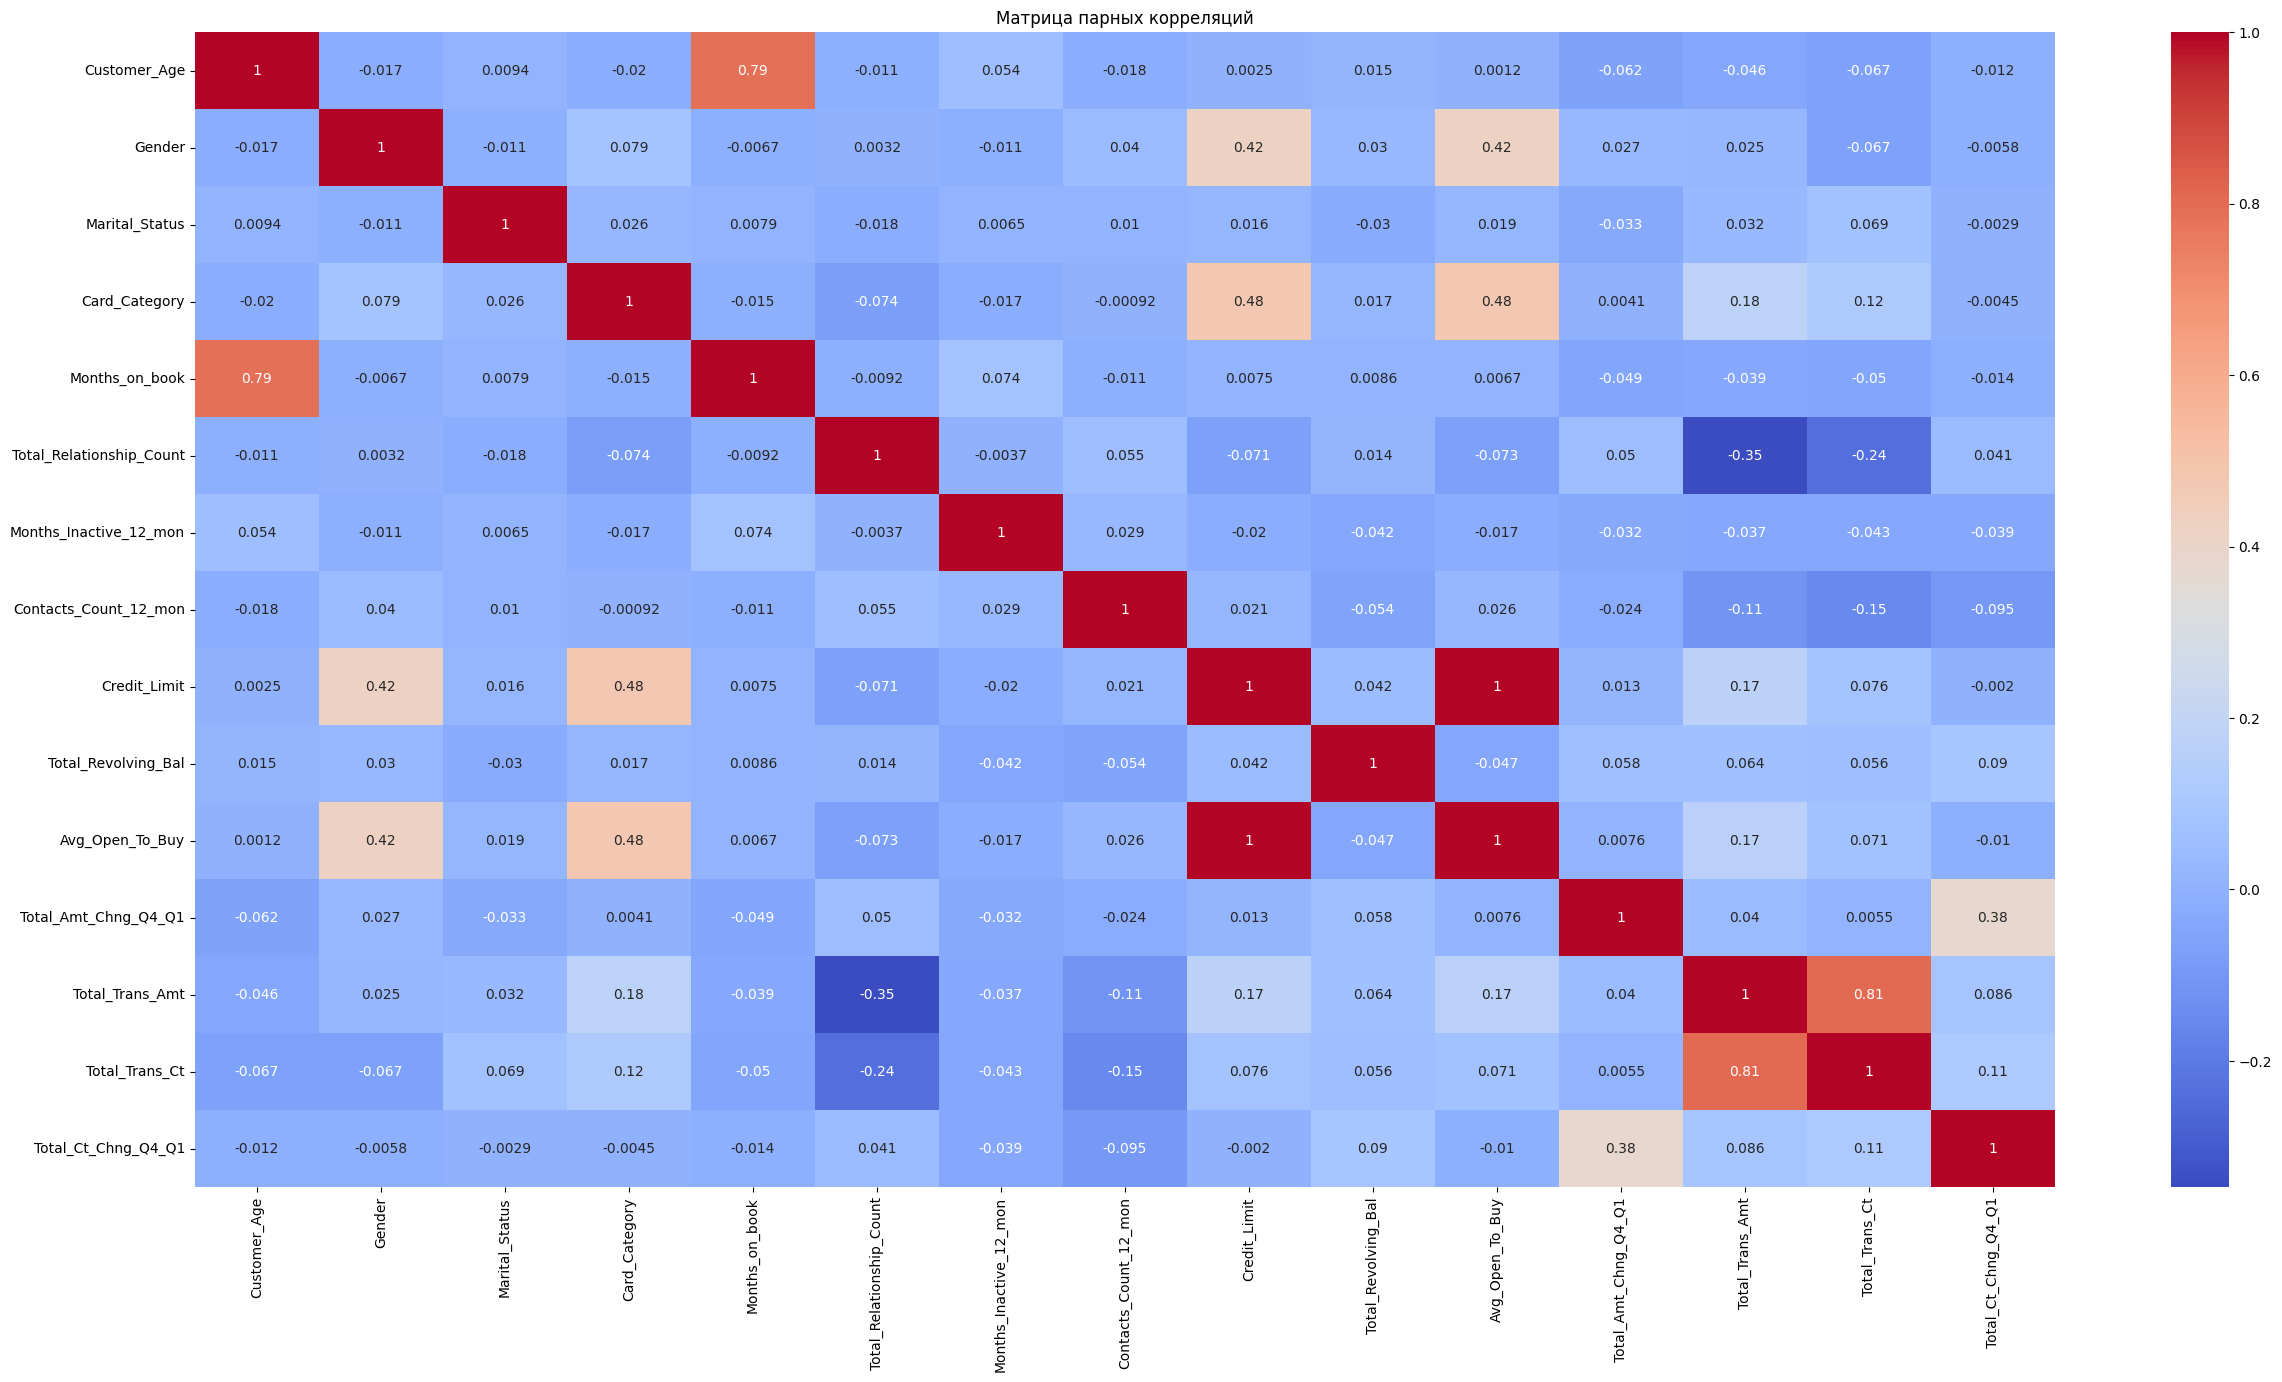

In [211]:
import seaborn as sns
correlation_matrix = x.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(30, 15), facecolor = 'white')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

Вывод: сильно коррелируют признаки 'Credit limit' и 'avg_open_to_buy', 'Customer_age' и 'Month_on_book', а также количество и сумма транзакций.

In [212]:
x.columns

Index(['Customer_Age', 'Gender', 'Marital_Status', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [213]:
# удалим коррелирующие признаки
x.drop(['Avg_Open_To_Buy', 'Total_Trans_Amt'],axis=1, inplace = True)

<font color='1A9BFF'>**Разделим датасет на обучающую и тестовую выборку**</font>

In [214]:
features_number = x.select_dtypes(include='number').columns
features_cat = x.select_dtypes(exclude='number').columns

In [215]:
# разделение на train test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7088, 13), (3039, 13), (7088,), (3039,))

<font color='1A9BFF'>**Решим проблему с дисбалансом классов в обучающей выборке**</font>

In [216]:
from imblearn.over_sampling import RandomOverSampler

# RandomOverSampler с параметрами по умолчанию сильно увеличит размер датасета
sampler = RandomOverSampler(random_state=111)
X_resampled, y_resampled = sampler.fit_resample(x_train, y_train)

X_resampled.shape, y_resampled.shape

((11868, 13), (11868,))

In [217]:
# дисбаланса классов теперь нет
y_resampled.value_counts()

Attrition_Flag
1    5934
0    5934
Name: count, dtype: int64

In [218]:
# обучим модель, рассчитаем метрики для многоклассовой классификации
def fit_evaluate(X_resampled, x_test, y_resampled, y_test):
    # число для фиксации генератора случайных чисел
    random_state = 111

    # список моделей
    models = [
        KNeighborsClassifier(),
        LogisticRegression(max_iter=3000),
        DecisionTreeClassifier(random_state=random_state),
        RandomForestClassifier(random_state=random_state),
        BaggingClassifier(random_state=random_state),
        GradientBoostingClassifier(n_estimators=90, learning_rate=0.8, max_depth=1),
        LGBMClassifier(random_state=random_state, verbosity=-1),
        CatBoostClassifier(random_state=random_state, verbose=0),
        XGBClassifier(),
    ]

    # список с названиями моделей и метриками качества на тестовых данных
    metrics = []

    # итерация по моделям, обучение, вычисление метрик качества и добавление в список
    for model in models:
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')

        metrics.append([model.__class__.__name__, accuracy, balanced_accuracy, f1])

    # датафрейм с названиями моделей и метриками
    df_metrics = pd.DataFrame(
        data=metrics,
        columns=['model', 'accuracy', 'balanced_accuracy', 'f1_score'],
        )

    return df_metrics

In [219]:
# рассчитаем метрики качества
df_metrics = fit_evaluate(X_resampled, x_test, y_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [220]:
df_metrics

model  accuracy  balanced_accuracy  f1_score
0        KNeighborsClassifier  0.768674           0.753514  0.794812
1          LogisticRegression  0.830536           0.810840  0.845970
2      DecisionTreeClassifier  0.896347           0.799802  0.896032
3      RandomForestClassifier  0.936492           0.858926  0.935120
4           BaggingClassifier  0.921356           0.858585  0.921984
5  GradientBoostingClassifier  0.889766           0.878679  0.897290
6              LGBMClassifier  0.936492           0.902899  0.937893
7          CatBoostClassifier  0.937150           0.899840  0.938299
8               XGBClassifier  0.937808           0.880398  0.937728

<font color='1A9BFF'>**Обучение лучшей модели и визуализация ROC AUC**</font>

In [221]:
# import xgboost as xgb
# from sklearn.ensemble import CatBoostClassifier

In [222]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# ансамбль из деревьев
cat_model = GradientBoostingClassifier (n_estimators=90, learning_rate=0.8, max_depth=1)

In [223]:
# обучение ансамбля
cat_model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=1, n_estimators=90)

In [224]:
# метрика качества Accuracy
y_pred_train = cat_model.predict(x_train)
y_pred_test = cat_model.predict(x_test)
accuracy_score (y_train, y_pred_train), accuracy_score (y_test, y_pred_test)

(0.9376410835214447, 0.930898321816387)

In [225]:
y_pred_prob = cat_model.predict_proba (x_test)[:,1]

In [226]:
fpr_test, tpr_test, thresholds = roc_curve(y_test,y_pred_prob)
roc_auc_test=auc(fpr_test, tpr_test)

In [227]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, cat_model.predict_proba (x_train)[:,1])
roc_auc_train=auc(fpr_train, tpr_train)

In [228]:
plt.figure(facecolor='white')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

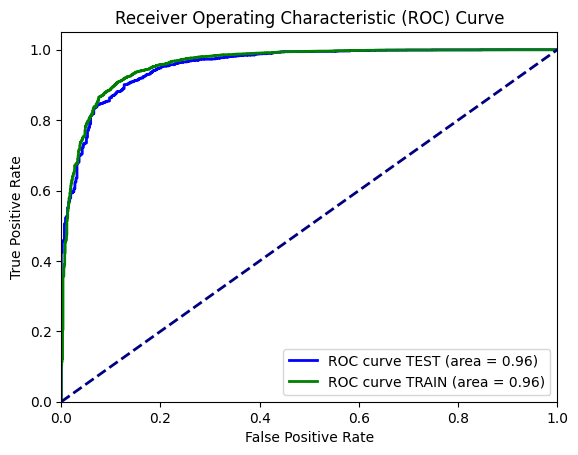

In [229]:
# построение ROC кривой
plt.figure(facecolor='white')
plt.plot (fpr_test, tpr_test, color='blue',lw=2,label=f'ROC curve TEST (area = {roc_auc_test:.2f})')
plt.plot (fpr_train, tpr_train, color='green',lw=2,label=f'ROC curve TRAIN (area = {roc_auc_test:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title ('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show

<font color='1A9BFF'>**Определение важных признаков**</font>

In [230]:
importances = cat_model.feature_importances_

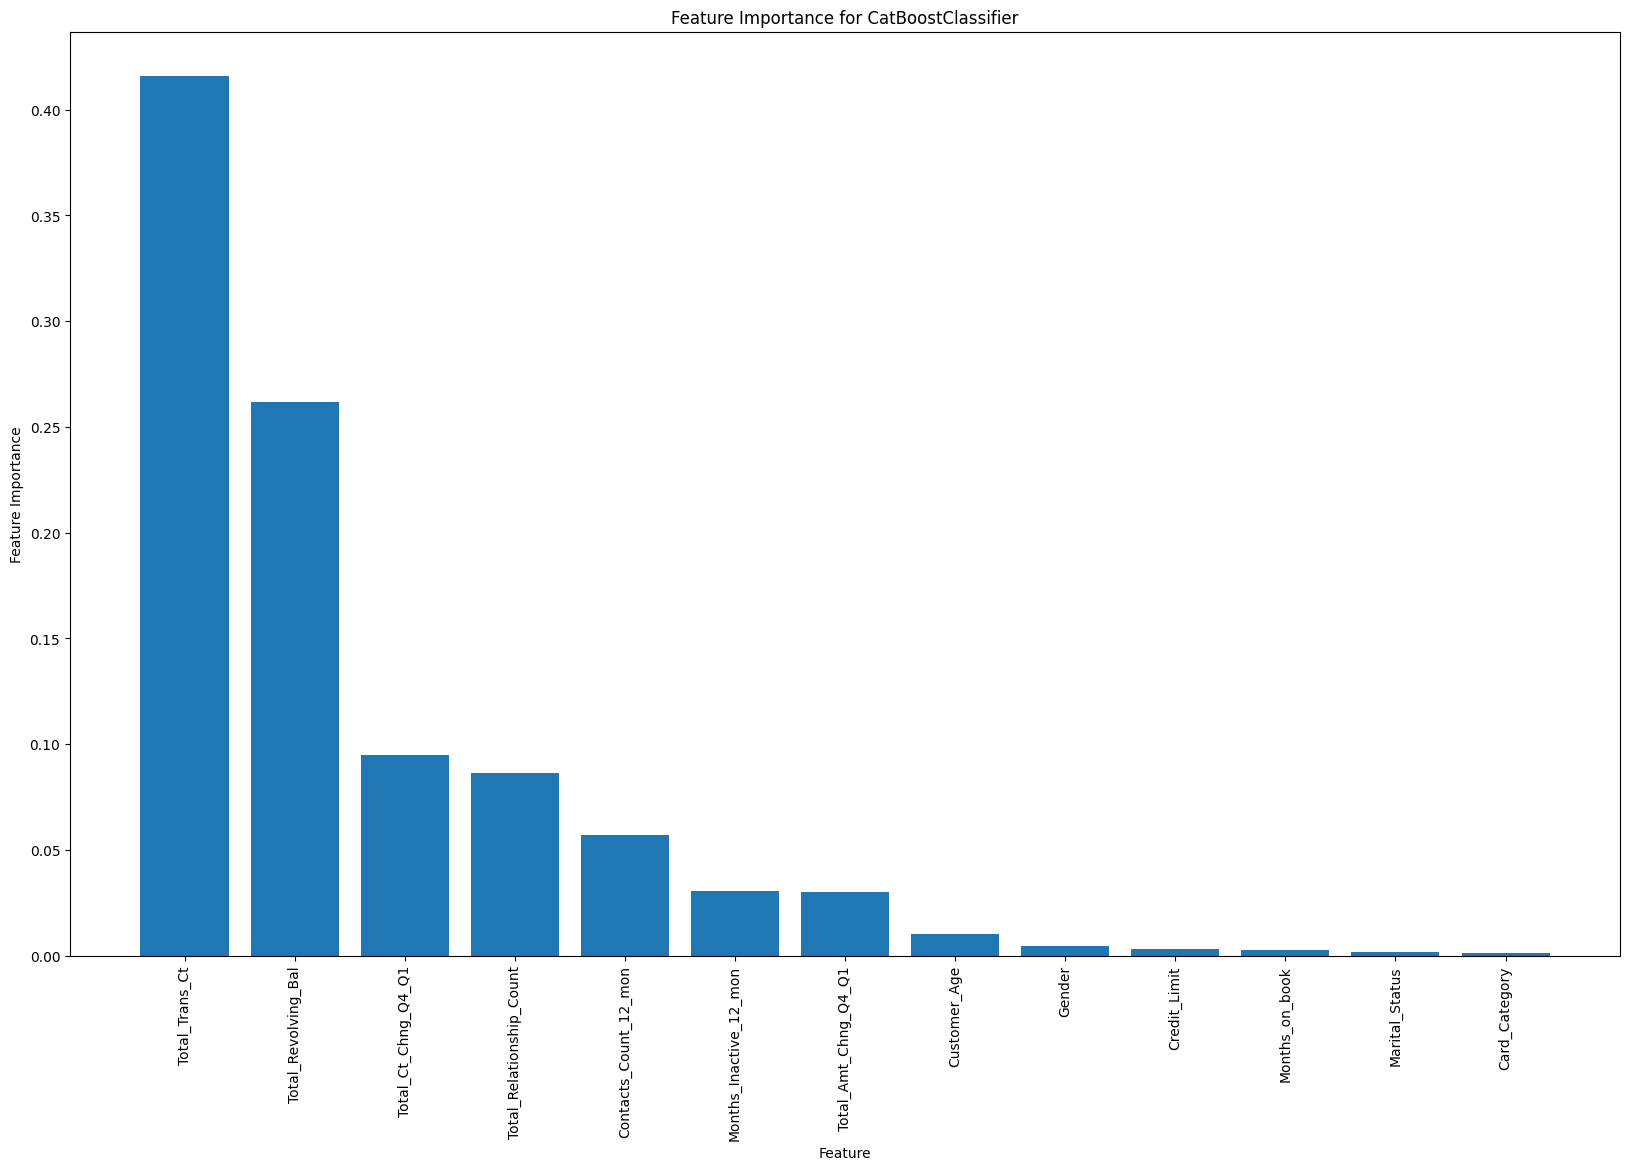

In [231]:
indices = np.argsort(importances)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(20, 12), facecolor = 'white')
plt.bar(range(x.shape[1]), importances[indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[indices], rotation = 90)  # Используем названия столбцов вместо индексов
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for CatBoostClassifier')
plt.show()

Вывод: признаки Education_Level, Income_Category и Dependent_count не существенны, не оказывают влияние на целевую переменную. Можно удалить из датасета.

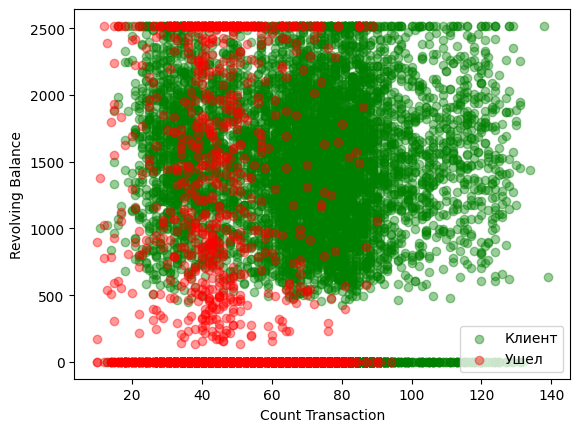

In [232]:
# разделение датасета на 2 части - действующие клиенты и клиенты оттока
df_0 = data[data.Attrition_Flag == 0]
df_1 = data[data.Attrition_Flag == 1]

# визуализация зависимости баланса от количества транзакций с указанием статуса клиента
plt.scatter(df_1.Total_Trans_Ct, df_1.Total_Revolving_Bal, color="green", label="Клиент", alpha=0.4)
plt.scatter(df_0.Total_Trans_Ct, df_0.Total_Revolving_Bal, color="red", label="Ушел", alpha=0.4)
plt.xlabel("Count Transaction")
plt.ylabel("Revolving Balance")
plt.legend(loc='lower right')
plt.show()

In [233]:
# !pip install shap

In [234]:
# import shap
# Создание SHAP Explainer для модели
# explainer = shap.Explainer(cat_model)

# Получение SHAP значений для всех объектов в данных
# shap_values = explainer(x)

# Показ важности признаков
# shap.summary_plot(shap_values, features=x)

Сериализация модели

In [235]:
import pickle

# сохранить на диск в формате pickle
with open('cat_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)

In [236]:
# так происходит загрузка сохраненной модели
with open('cat_model.pkl', 'rb') as f:
    model = pickle.load(f)

Инференс модели

In [237]:
x.columns

Index(['Customer_Age', 'Gender', 'Marital_Status', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [238]:
x.describe()

Customer_Age        Gender  Marital_Status  Card_Category  \
count  10127.000000  10127.000000    10127.000000   10127.000000   
mean      46.325960      0.470919        1.315493       0.179816   
std        8.016814      0.499178        0.603090       0.693039   
min       26.000000      0.000000        0.000000       0.000000   
25%       41.000000      0.000000        1.000000       0.000000   
50%       46.000000      0.000000        1.000000       0.000000   
75%       52.000000      1.000000        2.000000       0.000000   
max       73.000000      1.000000        2.000000       3.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
count          10127.000000    10127.000000         10127.000000  
mean               0.759941       64.858695             0.712222  
std                0.219207       23.472570             0.238086  
min                0.000000       10.000000             0.000000  
25%                0.631000       45.000000             0.582000  
50%                0.736000       67.000000             0.702000  
75%                0.859000       81.000000             0.818000  
max                3.397000      139.000000             3.714000

In [239]:
x.dtypes

Customer_Age                  int64
Gender                        int64
Marital_Status                int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
dtype: object

In [240]:
# словарь с названиями признаков на русском для отображения в приложении
features_dict = dict(
    Customer_Age = 'Возраст',
    Gender = 'Как давно клиент активировал кредитную карту (мес.)',
    Marital_Status = 'Семейный статус',
    Card_Category = 'Категория кредитной карты',
    Months_on_book = 'Как давно клиент активировал кредитную карту (мес.)',
    Total_Relationship_Count = 'Количество продуктов в банке',
    Months_Inactive_12_mon = 'Сколько месяцев клиент не активен в течение года',
    Contacts_Count_12_mon = 'Последняя коммуникация с клиентом',
    Credit_Limit = 'Кредитный лимит',
    Total_Revolving_Bal = 'Возобновляемый баланс',
    Total_Amt_Chng_Q4_Q1 = 'Изменение суммы кредита Q4/Q1',
    Total_Trans_Ct = 'Количество транзакций',
    Total_Ct_Chng_Q4_Q1 = 'Изменение количества транзакций Q4/Q1'
)

features_dict

{'Customer_Age': 'Возраст',
 'Gender': 'Как давно клиент активировал кредитную карту (мес.)',
 'Marital_Status': 'Семейный статус',
 'Card_Category': 'Категория кредитной карты',
 'Months_on_book': 'Как давно клиент активировал кредитную карту (мес.)',
 'Total_Relationship_Count': 'Количество продуктов в банке',
 'Months_Inactive_12_mon': 'Сколько месяцев клиент не активен в течение года',
 'Contacts_Count_12_mon': 'Последняя коммуникация с клиентом',
 'Credit_Limit': 'Кредитный лимит',
 'Total_Revolving_Bal': 'Возобновляемый баланс',
 'Total_Amt_Chng_Q4_Q1': 'Изменение суммы кредита Q4/Q1',
 'Total_Trans_Ct': 'Количество транзакций',
 'Total_Ct_Chng_Q4_Q1': 'Изменение количества транзакций Q4/Q1'}

In [241]:
# рандомные параметры для предсказания = данные которые пришли на вход
data = dict(
    Customer_Age = 42,
    Gender = 1,
    Marital_Status = 1,
    Card_Category = 1,
    Months_on_book = 5,
    Total_Relationship_Count = 2,
    Months_Inactive_12_mon = 4,
    Contacts_Count_12_mon = 2,
    Credit_Limit = 1000,
    Total_Revolving_Bal = 15,
    Total_Amt_Chng_Q4_Q1 = 650,
    Total_Trans_Ct = 112,
    Total_Ct_Chng_Q4_Q1 = 118
    )
# создать датафрейм для отображения в приложении
data_df = pd.DataFrame([data])
data_df

Customer_Age  Gender  Marital_Status  Card_Category  Months_on_book  \
0            42       1               1              1               5   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         2                       4                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0          1000                   15                   650             112   

   Total_Ct_Chng_Q4_Q1  
0                  118

In [242]:
# предикт и получение вероятности модели классификации
predict_proba = cat_model.predict_proba(data_df.values)[0, 1]
predict_proba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



0.9939643601145313

In [243]:
!pip install -q streamlit

In [244]:
# в Colab на момент 5.04.2024 стоит 1.2.2 поэтому нужно либо записать в requirements.txt scikit-learn==1.2.2
# либо перед обучением модели обновить в колабе !pip install -U scikit-learn и перезапустить среду

!pip list | grep -P "scikit-learn|Pillow|streamlit"

scikit-learn                       1.5.2
streamlit                          1.40.0


In [245]:
# https://drive.google.com/file/d/1fMLMr1YoSzLseNdGB7BMiEupM22OCixk/view?usp=drive_link
!gdown -O main_page_image.jpg 1fMLMr1YoSzLseNdGB7BMiEupM22OCixk

Downloading...
From: https://drive.google.com/uc?id=1fMLMr1YoSzLseNdGB7BMiEupM22OCixk
To: /content/main_page_image.jpg
100% 676k/676k [00:00<00:00, 70.6MB/s]


In [246]:
import time
import streamlit as st
import streamlit.components.v1 as components

In [247]:
from pathlib import Path
import pickle
from PIL import Image
import pandas as pd

In [248]:
# ====================== главная страница ============================

# параметры главной страницы
# https://docs.streamlit.io/library/api-reference/utilities/st.set_page_config
st.set_page_config(
    layout='wide',
    initial_sidebar_state='auto',
    page_title='Отток app',
    page_icon='🧊',
)


# ----------- функции -------------------------------------

# функция для загрузки картики с диска
# кэшируем иначе каждый раз будет загружатся заново
@st.cache_data
def load_image(image_path):
    image = Image.open(image_path)
    return image

# функция загрузки модели
# кэшируем иначе каждый раз будет загружатся заново
@st.cache_data
def load_model(model_path):
    # загрузка сериализованной модели
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model


# ------------- загрузка картинки для страницы и модели ---------

# путь до картинки
image_path = 'main_page_image.jpg'
image = load_image(image_path)

# путь до модели
model_path = 'cat_model.pkl'
churn_model = load_model(model_path)


# ---------- отрисовка текста и картинки ------------------------
st.write(
    """
    ### Диагностика оттока клиента с кредитной карты
    Введите ваши данные и получите результат
    """
)

# отрисовка картинки на странице
st.image(image, width=600)


# ====================== боковое меню для ввода данных ===============

st.sidebar.header('Входные данные пользователя')

# словарь с названиями признаков на русском для отображения в приложении
features = dict(
    Customer_Age = 'Возраст',
    Gender = 'Как давно клиент активировал кредитную карту (мес.)',
    Marital_Status = 'Семейный статус',
    Card_Category = 'Категория кредитной карты',
    Months_on_book = 'Как давно клиент активировал кредитную карту (мес.)',
    Total_Relationship_Count = 'Количество продуктов в банке',
    Months_Inactive_12_mon = 'Сколько месяцев клиент не активен в течение года',
    Contacts_Count_12_mon = 'Последняя коммуникация с клиентом',
    Credit_Limit = 'Кредитный лимит',
    Total_Revolving_Bal = 'Возобновляемый баланс',
    Total_Amt_Chng_Q4_Q1 = 'Изменение суммы кредита Q4/Q1',
    Total_Trans_Ct = 'Количество транзакций',
    Total_Ct_Chng_Q4_Q1 = 'Изменение количества транзакций Q4/Q1'
)

# словари с названиями признаков и соответствующими индексами
gender_label_to_index = {'Female': 0, 'Male': 1}
ms_label_to_index = {
    'Divorced': 0,
    'Married': 1,
    'Single': 2}
card_label_to_index = {
    'Blue': 0,
    'Gold': 1,
    'Platinum': 2,
    'Silver': 3}

# кнопки - слайдеры для ввода данных человека
Gender = st.sidebar.radio(features['Gender'], gender_label_to_index.keys(), horizontal=True)
Marital_Status = st.sidebar.radio(features['Marital_Status'], ms_label_to_index.keys(), horizontal=True)
Card_Category = st.sidebar.radio(features['Card_Category'], card_label_to_index.keys(), horizontal=True)
Customer_Age = st.sidebar.slider(features['Customer_Age'], min_value=26, max_value=73, value=42, step=1)
Months_on_book = st.sidebar.slider(features['Months_on_book'], min_value=26, max_value=73, value=5, step=1)
Total_Relationship_Count = st.sidebar.slider(features['Total_Relationship_Count'], min_value=1, max_value=6, value=2, step=1)
Months_Inactive_12_mon = st.sidebar.slider(features['Months_Inactive_12_mon'], min_value=0, max_value=6, value=2, step=1)
Contacts_Count_12_mon = st.sidebar.slider(features['Contacts_Count_12_mon'], min_value=0, max_value=6, value=2, step=1)
Credit_Limit = st.sidebar.slider(features['Credit_Limit'], min_value=1400, max_value=34510, value=3000, step=1)
Total_Revolving_Bal = st.sidebar.slider(features['Total_Revolving_Bal'], min_value=0, max_value=2517, value=1000, step=1)
Total_Amt_Chng_Q4_Q1 = st.sidebar.slider(features['Total_Amt_Chng_Q4_Q1'], min_value=0, max_value=4, value=2, step=1)
Total_Trans_Ct = st.sidebar.slider(features['Total_Trans_Ct'], min_value=10, max_value=139, value=100, step=1)
Total_Ct_Chng_Q4_Q1 = st.sidebar.slider(features['Total_Ct_Chng_Q4_Q1'], min_value=0, max_value=4, value=2, step=1)


# записать входные данные в словарь и в датафрейм
data_df = pd.DataFrame([dict(
    Gender=gender_label_to_index[Gender],
    Marital_Status=ms_label_to_index[Marital_Status],
    Card_Category=card_label_to_index[Card_Category],
    Customer_Age=Customer_Age,
    Months_on_book=Months_on_book,
    Total_Relationship_Count=Total_Relationship_Count,
    Months_Inactive_12_mon=Months_Inactive_12_mon,
    Contacts_Count_12_mon=Contacts_Count_12_mon,
    Credit_Limit=Credit_Limit,
    Total_Revolving_Bal=Total_Revolving_Bal,
    Total_Amt_Chng_Q4_Q1=Total_Amt_Chng_Q4_Q1,
    Total_Trans_Ct=Total_Trans_Ct,
    Total_Ct_Chng_Q4_Q1=Total_Ct_Chng_Q4_Q1,
)])


# =========== вывод входных данных и предсказания модели ==========

# вывести входные данные на страницу
st.write("##### Ваши данные")
st.write(data_df)


# предикт моделью входных данных, на выходе вероятность диабета
churn_prob = churn_model.predict_proba(data_df.values)[0, 1]


# вывести предсказание модели
st.write("##### Вероятность оттока")
st.write(f'{churn_prob:.2f}')

2024-11-10 11:55:54.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.817 No runtime found, using MemoryCacheStorageManager
2024-11-10 11:55:54.827 No runtime found, using MemoryCacheStorageManager
2024-11-10 11:55:54.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-10 11:55:54.865 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

<font color='green'>**Ваш вывод:
типы данных определены верно**</font>

